# NN - Домашнее задание 3

## Вам необходимо воспроизвести архитектуру нейронной сети по картинке



### Сеть 1

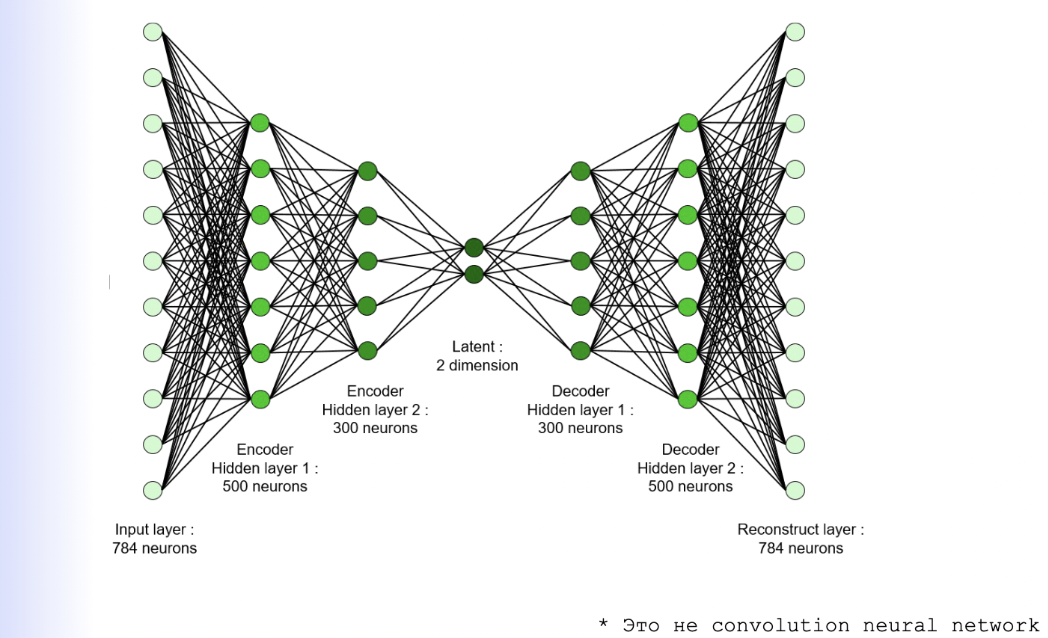

In [1]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(),
            nn.Linear(500, 300),
            nn.ReLU(),
            nn.Linear(300, 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 300),
            nn.ReLU(),
            nn.Linear(300, 500),
            nn.ReLU(),
            nn.Linear(500, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()

print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


### Сеть 2

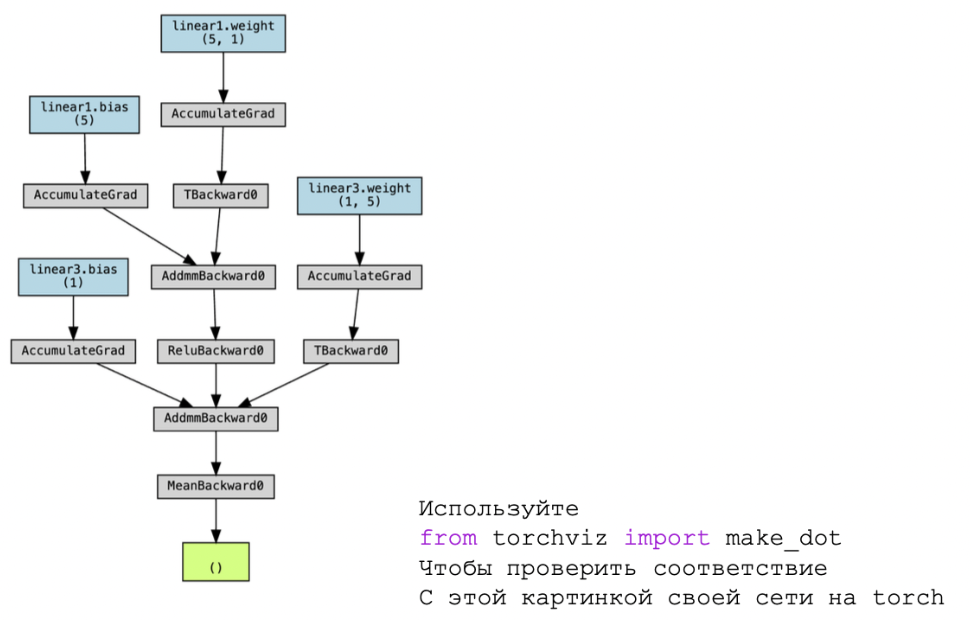

In [5]:
# !pip install torchviz

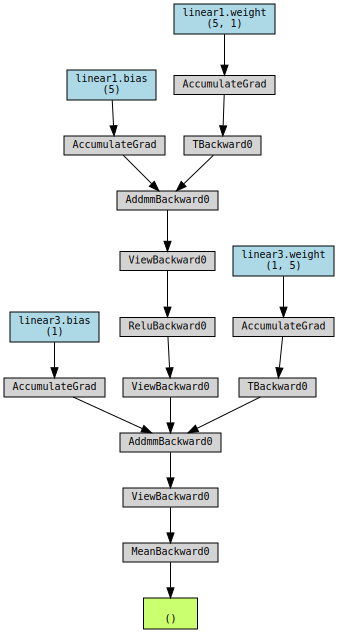

In [4]:
from torchviz import make_dot

class NN2(nn.Module):
    def __init__(self):
        super(NN2, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = x.mean()

        return x

model = NN2()

x = torch.tensor([1.1])
y = model(x)

dot = make_dot(y, params=dict(model.named_parameters()))
dot

### Сеть 3

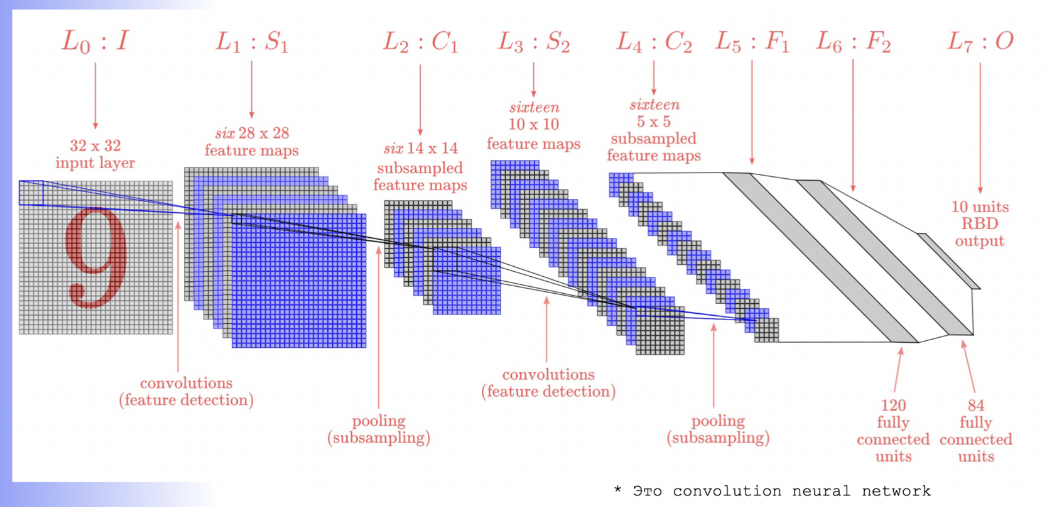

In [3]:
class NN3(nn.Module):
    def __init__(self):
        super(NN3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)

        x = x.view(-1, 16*5*5)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)

        return x

input_tensor = torch.randn(1, 32, 32)
model = NN3()
output_tensor = model(input_tensor)

print(output_tensor.shape)

torch.Size([1, 10])
